In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
df = pd.read_csv("Salary_data_cleaned.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Average_Salary,Company_text,Job_State,same_state,Company_age,Python_yn,R_Studio_yn,Spark_yn,AWS,Excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,49,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,38,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,12,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,57,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,24,1,0,0,0,1


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'Min_Salary', 'Max_Salary',
       'Average_Salary', 'Company_text', 'Job_State', 'same_state',
       'Company_age', 'Python_yn', 'R_Studio_yn', 'Spark_yn', 'AWS',
       'Excel_yn'],
      dtype='object')

## Job title and seniority 

In [4]:
def title_simplification(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

## Job title and seniority 
def seniority(title):
    if  'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'



In [5]:
df['Job_simp'] = df['Job Title'].apply(title_simplification)

In [6]:
df.Job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: Job_simp, dtype: int64

In [7]:
df['Seniority'] = df['Job Title'].apply(seniority)

In [8]:
df.Seniority.value_counts()

na        520
senior    220
jr          2
Name: Seniority, dtype: int64

##  Fix state Los Angeles 

In [9]:
df.Job_State.value_counts()
#The strip() method returns a copy of the string in which all chars have been stripped from the beginning and the end of the string
df["Job_State"] = df.Job_State.apply(lambda x : x.strip() if x.strip().lower() != "los angeles" else 'CA')
df.Job_State.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
IN     10
UT     10
AZ      9
MO      9
AL      8
DE      6
MI      6
KY      6
GA      6
CT      5
IA      5
OR      4
LA      4
NE      4
NM      3
KS      3
MN      2
ID      2
RI      1
SC      1
Name: Job_State, dtype: int64

##  Job description length 

In [10]:
# See the length of a job description according to the salary
df['Desc_len'] = df["Job Description"].apply(lambda x : len(x))
df.Desc_len

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: Desc_len, Length: 742, dtype: int64

##  Competitor count


In [11]:
df["Competitor_Count"] = df.Competitors.apply(lambda x: len(x.split(',')) if x != "-1" else 0)

In [12]:
df.Competitor_Count

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: Competitor_Count, Length: 742, dtype: int64

## hourly wage to annual 

In [13]:
# salary * 1000/100
df["Min_Salary"] = df.apply(lambda x: x.Min_Salary*2 if x.Hourly ==1 else x.Min_Salary, axis=1 )
df["Max_Salary"] = df.apply(lambda x: x.Max_Salary*2 if x.Hourly ==1 else x.Max_Salary, axis=1)

In [14]:
df[df["Hourly"]==1][['Hourly', 'Min_Salary', 'Max_Salary']]

,Hourly,Min_Salary,Max_Salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


# remove new line from company text

In [15]:
df.Company_text

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: Company_text, Length: 742, dtype: object

In [16]:
df.Company_text = df.Company_text.apply(lambda x : x.replace('\n',''))

In [17]:
df.Company_text

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company_text, Length: 742, dtype: object

# Stats

In [18]:
df.describe()

,Rating,Founded,Hourly,Employer_Provided,Min_Salary,Max_Salary,Average_Salary,same_state,Company_age,Python_yn,R_Studio_yn,Spark_yn,AWS,Excel_yn,Desc_len,Competitor_Count
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,48.456873,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.900445,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


### Plot histograms for most relevant features

In [19]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'Min_Salary', 'Max_Salary',
       'Average_Salary', 'Company_text', 'Job_State', 'same_state',
       'Company_age', 'Python_yn', 'R_Studio_yn', 'Spark_yn', 'AWS',
       'Excel_yn', 'Job_simp', 'Seniority', 'Desc_len', 'Competitor_Count'],
      dtype='object')

<AxesSubplot:>

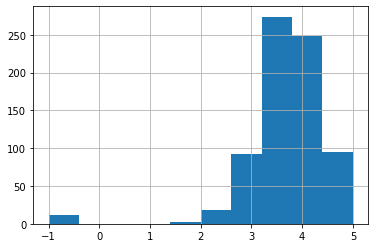

In [20]:
df.Rating.hist()

<AxesSubplot:>

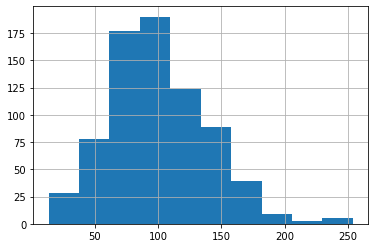

In [21]:
df.Average_Salary.hist()

<AxesSubplot:>

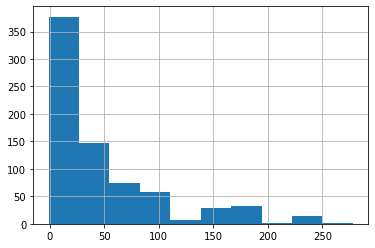

In [22]:
df.Company_age.hist()

<AxesSubplot:>

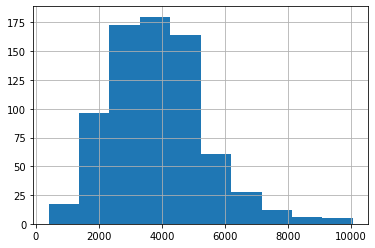

In [23]:
df.Desc_len.hist()

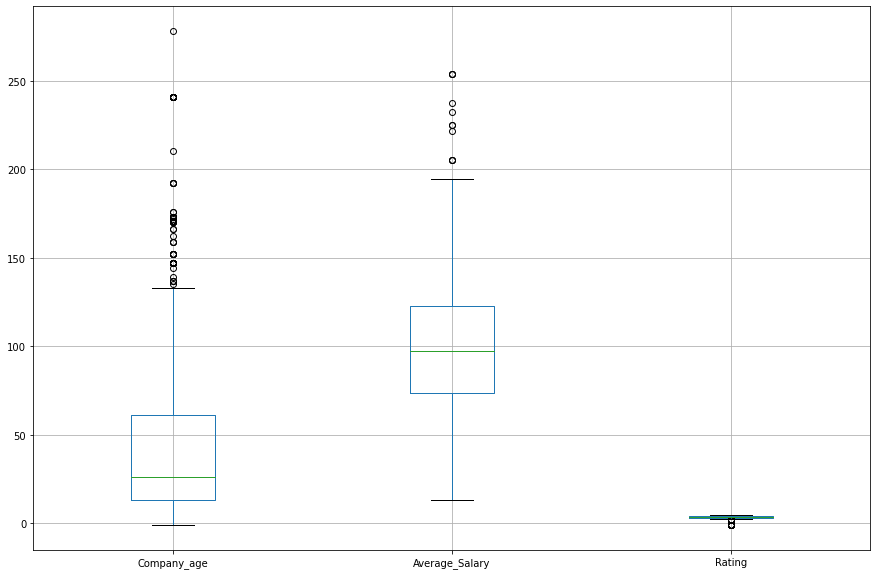

In [24]:
plt.figure(figsize=(15,10))

df.boxplot(column=['Company_age', 'Average_Salary', 'Rating'])
plt.show()

<AxesSubplot:>

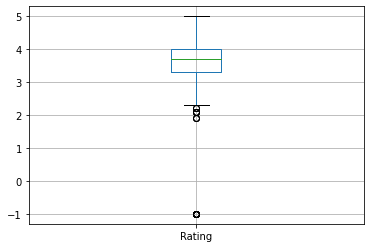

In [25]:
df.boxplot(column=["Rating"])

In [26]:
df[["Company_age", "Average_Salary", "Rating", "Desc_len"]].corr()

,Company_age,Average_Salary,Rating,Desc_len
Company_age,1.000000,0.019492,0.024665,0.164461
Average_Salary,0.019492,1.000000,0.013492,0.078808
Rating,0.024665,0.013492,1.000000,-0.012281
Desc_len,0.164461,0.078808,-0.012281,1.000000


In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'Min_Salary', 'Max_Salary',
       'Average_Salary', 'Company_text', 'Job_State', 'same_state',
       'Company_age', 'Python_yn', 'R_Studio_yn', 'Spark_yn', 'AWS',
       'Excel_yn', 'Job_simp', 'Seniority', 'Desc_len', 'Competitor_Count'],
      dtype='object')

<AxesSubplot:>

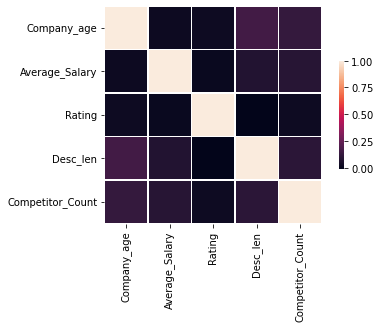

In [28]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df[['Company_age','Average_Salary','Rating','Desc_len','Competitor_Count']].corr(),
             square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [29]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'Min_Salary', 'Max_Salary',
       'Average_Salary', 'Company_text', 'Job_State', 'same_state',
       'Company_age', 'Python_yn', 'R_Studio_yn', 'Spark_yn', 'AWS',
       'Excel_yn', 'Job_simp', 'Seniority', 'Desc_len', 'Competitor_Count'],
      dtype='object')

### Categorical Vars

In [30]:
df_categ = df[["Rating","Location","Industry","Headquarters","Size",
              "Type of ownership","Sector","Job_State","Revenue", "Company_text","same_state",
              "Python_yn",'R_Studio_yn', "Spark_yn",
              "AWS","Excel_yn","Job_simp","Seniority"]]

graph for Rating: total =31


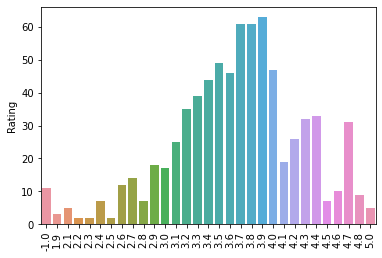

graph for Location: total =200


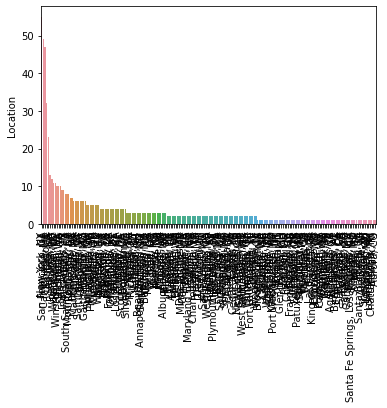

graph for Industry: total =60


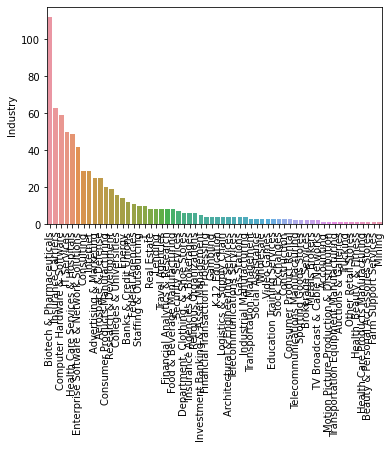

graph for Headquarters: total =198


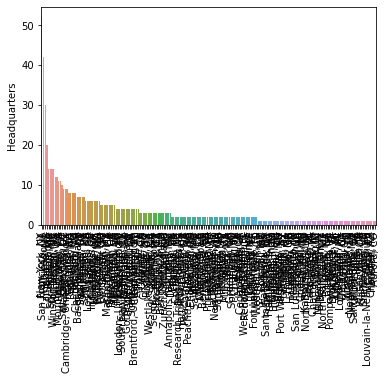

graph for Size: total =9


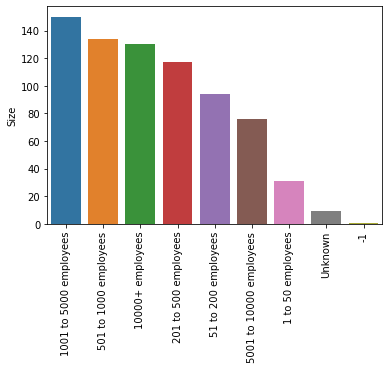

graph for Type of ownership: total =11


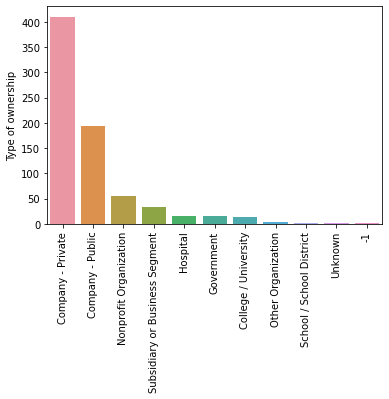

graph for Sector: total =25


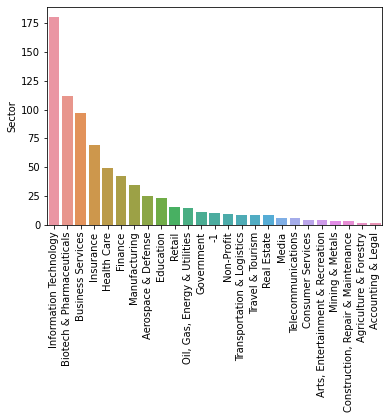

graph for Job_State: total =37


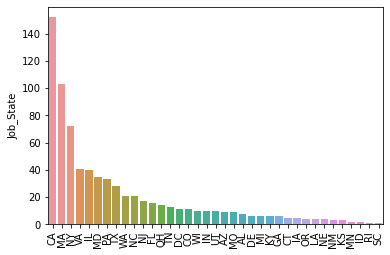

graph for Revenue: total =14


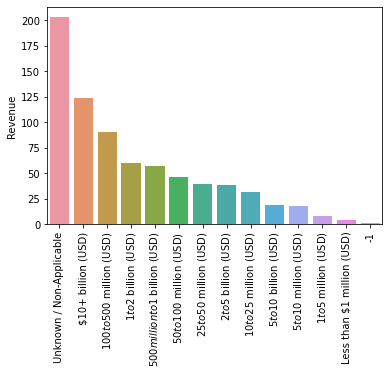

graph for Company_text: total =343


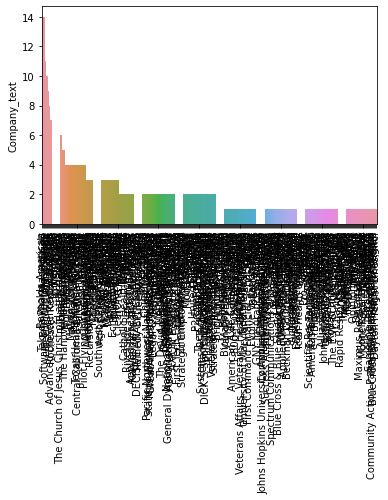

graph for same_state: total =2


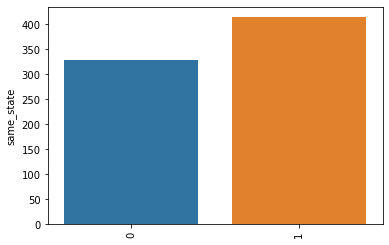

graph for Python_yn: total =2


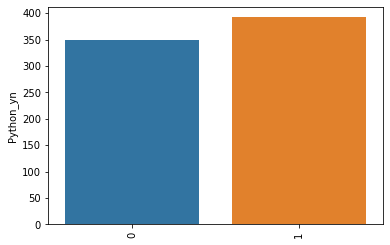

graph for R_Studio_yn: total =2


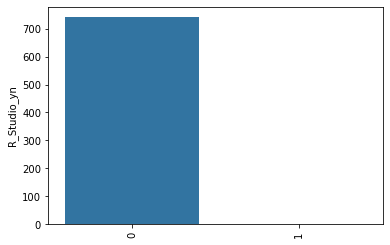

graph for Spark_yn: total =2


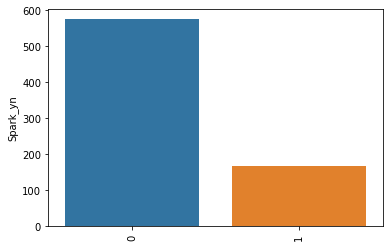

graph for AWS: total =2


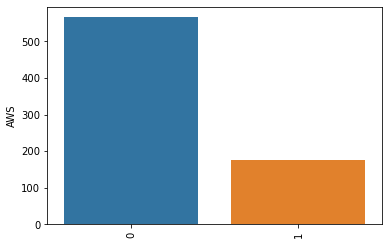

graph for Excel_yn: total =2


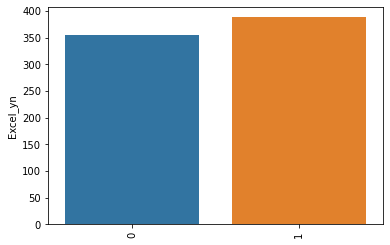

graph for Job_simp: total =7


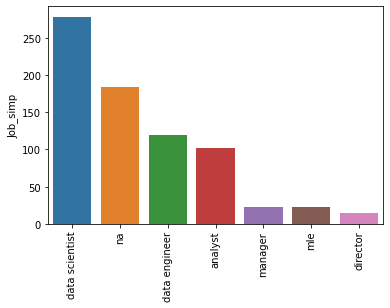

graph for Seniority: total =3


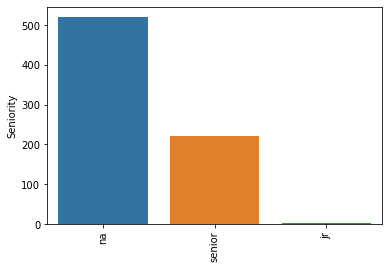

In [31]:
for i in df_categ.columns:
    categ_num = df_categ[i].value_counts()
    print("graph for %s: total =%d" % (i,len(categ_num)))
    chart = sns.barplot(x=categ_num.index, y=categ_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

#### Let's plot really long categorical cols

Graph for Location: total 20


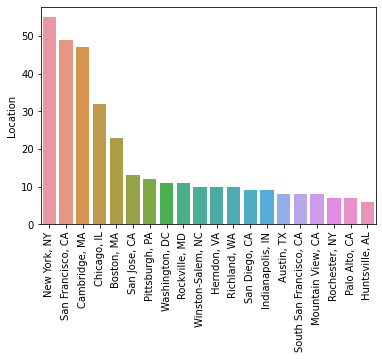

Graph for Industry: total 20


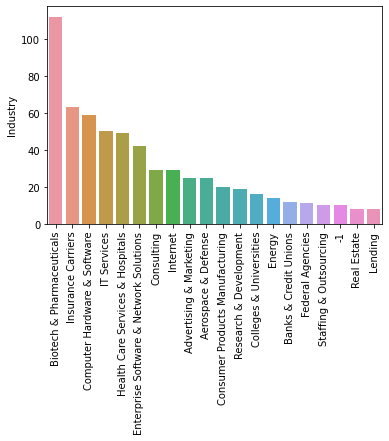

Graph for Headquarters: total 20


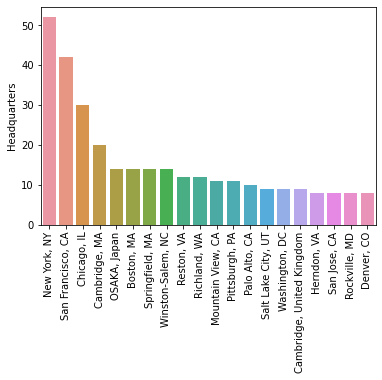

Graph for Company_text: total 20


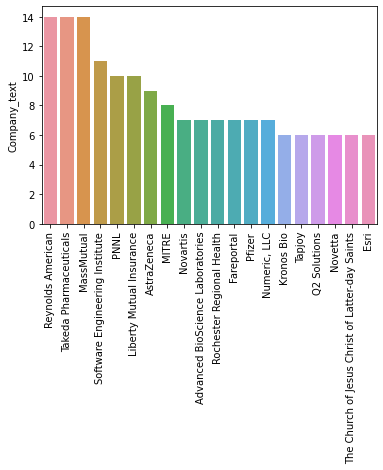

In [32]:
for i in df_categ[["Location", "Industry", "Headquarters", "Company_text"]].columns:
    categ_num = df_categ[i].value_counts()[:20]
    print("Graph for %s: total %d" % (i, len(categ_num)) )
    chart =sns.barplot(x=categ_num.index, y= categ_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'Min_Salary', 'Max_Salary',
       'Average_Salary', 'Company_text', 'Job_State', 'same_state',
       'Company_age', 'Python_yn', 'R_Studio_yn', 'Spark_yn', 'AWS',
       'Excel_yn', 'Job_simp', 'Seniority', 'Desc_len', 'Competitor_Count'],
      dtype='object')

In [37]:
# Salary by different categs

pd.pivot_table(df, index="Job_simp", values="Average_Salary")

,Average_Salary
Job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [39]:
pd.pivot_table(df, index=["Seniority","Job_simp"], values="Average_Salary")

Average_Salary
Seniority Job_simp                      
jr        analyst              56.500000
          data scientist      106.500000
na        analyst              61.155405
          data engineer        96.701220
          data scientist      107.043011
          director            168.607143
          manager              84.022727
          mle                 119.133333
          na                   73.988189
senior    analyst              79.092593
          data engineer       124.689189
          data scientist      138.956522
          mle                 142.071429
          na                  109.061404

Display a whole dataframe

In [42]:
pd.set_option('display.max_rows', None)

In [47]:
pd.pivot_table(df, index=["Job_State","Job_simp"], values="Average_Salary", aggfunc='count').sort_values('Job_State', ascending=False)

Average_Salary
Job_State Job_simp                      
WI        na                           4
          data scientist               3
          analyst                      3
WA        na                           1
          data scientist              17
          analyst                      3
VA        na                           5
          mle                          2
          data scientist              18
          data engineer               10
          analyst                      6
UT        data engineer                3
          analyst                      4
          data scientist               3
TX        na                           7
          data scientist              13
          data engineer                8
TN        data scientist               1
          data engineer               10
          analyst                      2
SC        na                           1
RI        analyst                      1
PA        manager                      3
          data engineer                1
          data scientist               6
          analyst                      8
          mle                          7
          na                           8
OR        data scientist               3
          data engineer                1
OH        na                           3
          data scientist               7
          analyst                      4
NY        na                          12
          mle                          2
          data scientist              40
          data engineer                4
          analyst                     14
NM        data scientist               3
NJ        data scientist               4
          analyst                      6
          data engineer                2
          manager                      2
          director                     2
          na                           1
NE        na                           4
NC        na                          12
          data scientist               3
          data engineer                6
MO        na                           3
          manager                      1
          data scientist               3
          analyst                      2
MN        data engineer                1
          analyst                      1
MI        manager                      2
          data scientist               4
MD        na                          16
          data scientist              13
          data engineer                3
          analyst                      3
MA        na                          46
          manager                      5
          director                     6
          data scientist              30
          data engineer               12
          analyst                      4
LA        analyst                      1
          data engineer                2
          na                           1
KY        na                           4
          data scientist               2
KS        mle                          3
IN        na                           4
          data scientist               2
          data engineer                4
IL        analyst                      3
          na                           6
          mle                          2
          director                     6
          data scientist              15
          data engineer                8
ID        analyst                      2
IA        analyst                      2
          data engineer                3
GA        data scientist               3
          na                           3
FL        data scientist               7
          data engineer                3
          analyst                      6
DE        na                           6
DC        data scientist               5
          data engineer                4
          analyst                      2
CT        na                           3
          data scientist               2
CO      

In [50]:
#Filter the data only to data scientist and new york state
pd.pivot_table(df[df.Job_simp == "data scientist"], index="Job_State", values="Average_Salary").sort_values('Average_Salary', ascending=False)

,Average_Salary
Job_State,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [51]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_Provided', 'Min_Salary', 'Max_Salary',
       'Average_Salary', 'Company_text', 'Job_State', 'same_state',
       'Company_age', 'Python_yn', 'R_Studio_yn', 'Spark_yn', 'AWS',
       'Excel_yn', 'Job_simp', 'Seniority', 'Desc_len', 'Competitor_Count'],
      dtype='object')

In [58]:
# rating, industry, sector, revenue, num of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of ownership
#Pivots: 
df_pivots = df[["Rating", "Industry","Sector", "Revenue","Competitor_Count",
"Hourly", "Employer_Provided", "Python_yn", "R_Studio_yn", "Spark_yn",
"AWS", "Excel_yn", "Desc_len","Type of ownership","Average_Salary"]]

In [65]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values="Average_Salary").sort_values("Average_Salary", ascending=False))


Rating
        Average_Salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
Industry
                                          Average_Salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.0000

ValueError: Grouper for 'Average_Salary' not 1-dimensional

In [67]:
pd.pivot_table(df_pivots, index="Revenue",columns="Python_yn", values="Average_Salary", aggfunc='count')

Python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


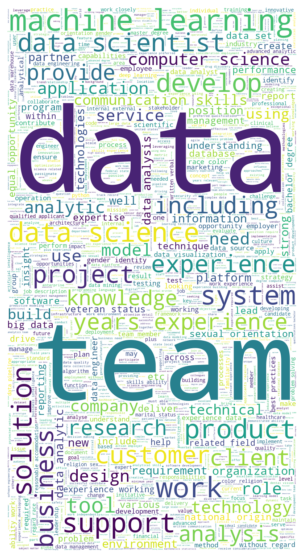

In [80]:
words = " ".join(df["Job Description"])

def punctuation_stop(text):
    """ remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()